In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import sklearn
import cv2
%matplotlib inline
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
#Loading all the models

In [3]:
ls model

 Volume in drive D is DATA
 Volume Serial Number is FAA9-24C8

 Directory of D:\FaceRecognition\model

19-05-2021  20:03    <DIR>          .
19-05-2021  20:03    <DIR>          ..
19-05-2021  20:11         4,081,923 1pca_50.pickle
19-05-2021  15:20           930,127 haarcascade_frontalface_default.xml
19-05-2021  18:25               152 mean_preprocess.pickle
19-05-2021  18:24           315,705 model_svm.pickle
19-05-2021  17:17         4,081,923 pca_50.pickle
19-05-2021  20:02           664,962 x_pca_50.pickle
               6 File(s)     10,074,792 bytes
               2 Dir(s)  281,975,861,248 bytes free


In [4]:
haar=cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
mean=pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svm=pickle.load(open('./model/model_svm.pickle','rb'))
model_pca=pickle.load(open('./model/pca_50.pickle','rb'))

print(' hurray')

 hurray


In [5]:
mean

array(0.48743441)

In [6]:
model_pca.transform

<bound method _BasePCA.transform of PCA(n_components=50, whiten=True)>

In [7]:
saver=np.zeros((1,10000))

In [8]:
saver=saver+mean


In [9]:
saver

array([[0.48743441, 0.48743441, 0.48743441, ..., 0.48743441, 0.48743441,
        0.48743441]])

In [10]:
saver.shape

(1, 10000)

In [23]:
gender_pre={0:'Male',1:'Female'}
font=cv2.FONT_HERSHEY_COMPLEX

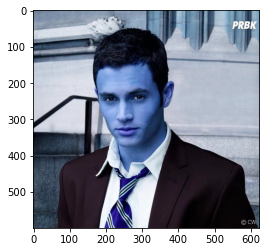

In [12]:
test_data_path='./data/male_110.jpg'
color='bgr'
img=cv2.imread(test_data_path)
plt.imshow(img)

In [32]:

def pipeline_model(img,color='rgb'):
    if color=='bgr':
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


    faces=haar.detectMultiScale(gray,1.5,3)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        #Cropping
        cp=gray[y:y+h,x:x+w]
        #Normalisation
        cp=cp/255.0
        #Resizing image into (100,100)
        if cp.shape[1]>100:
            cp_resize=cv2.resize(cp,(100,100),cv2.INTER_AREA)
        else:
            cp_resize=cv2.resize(cp,(100,100),cv2.INTER_CUBIC)
        # Flattening 1x 10000

        cp_reshape=cp_resize.reshape(1,10000) # 1x 10000
        #plt.imshow(cp_reshape)
        #subtracting with mean
        cp_mean=cp_reshape-mean # saver is mean
        # Eigen image
        eigen_image=model_pca.transform(cp_mean)

        # Pass to ml Model(Support Vector Machine)
        results=model_svm.predict_proba(eigen_image)[0]

        # prediction
        predict=results.argmax() # 0 or 1
        score=results[predict]

        #sss
        text= "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,0.8,(0,255,0),2)
    return img    


In [ ]:
from i

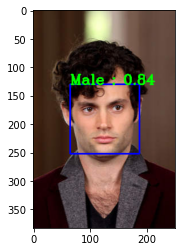

In [36]:
# TO read in rgb
test_data_path='./data/male_110.jpg'
color='bgr'
img=Image.open(test_data_path)
img=np.array(img)
img=pipeline_model(img,color)
plt.imshow(img)

In [37]:
# Applying pipeline model to video

In [45]:
cap= cv2.VideoCapture('./data/video.mp4')
while True:
    ret,frame=cap.read() #bgr format
    
    if ret==False:
        break
    frame=pipeline_model(frame,color='bgr')
    cv2.imshow('Timepass',frame)
    if cv2.waitKey(1) == ord('s'): # escape key has 27; ord('s')
        break
cv2.destroyAllWindows()
cap.release()